In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils


2022-11-30 14:11:39.433558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train /= 255
x_test /= 255

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = Sequential()

# Convnet Layer:
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classification Layer:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

2022-11-30 14:11:45.753691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
model.fit(x_train, y_train,batch_size=128,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 27s 55ms/step - loss: 0.4474 - accuracy: 0.8598 - val_loss: 0.0635 - val_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.1196 - accuracy: 0.9684 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0852 - accuracy: 0.9782 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0669 - accuracy: 0.9828 - val_loss: 0.0331 - val_accuracy: 0.9906
Epoch 5/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0581 - accuracy: 0.9854 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0463 - accuracy: 0.9880 - val_loss: 0.0325 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0409 - accuracy: 0.9894 - val_loss: 0.0292 - val_accuracy:

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03300976753234863
Test accuracy: 0.9916999936103821


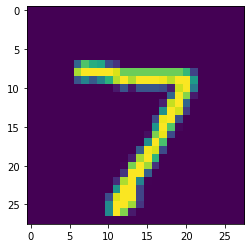

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_test[:1].reshape(28,28))
plt.show()

In [15]:
pre = model.predict(x_test[:1])

1/1 [==============================] - 0s 152ms/step


In [16]:
import numpy as np
max_index = np.argmax(pre, axis=1)

In [17]:
max_index

array([7])

In [18]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
